In [1]:
#Librerías

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling
from pgmpy.estimators import BayesianEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import plotly.express as px
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.estimators import BicScore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import networkx as nx
import matplotlib.pyplot as plt

#Cargamos la base de datos
datos = 'BD_Cuartiles.csv'
df_global = pd.read_csv(datos)


c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Eliminamos las columnas que no correlacionadas (segun el mapa) y los puntajes

df_global = df_global.drop('punt_ingles', axis=1)
df_global = df_global.drop('punt_matematicas', axis=1)
df_global = df_global.drop('punt_sociales_ciudadanas', axis=1)
df_global = df_global.drop('punt_c_naturales', axis=1)
df_global = df_global.drop('punt_lectura_critica', axis=1)
df_global = df_global.drop('cole_bilingue', axis=1)
df_global = df_global.drop('cole_calendario', axis=1)
df_global = df_global.drop('cole_jornada', axis=1)
df_global = df_global.drop('estu_genero', axis=1)
df_global = df_global.drop('fami_educacionmadre', axis=1)
df_global = df_global.drop('fami_educacionpadre', axis=1)
df_global = df_global.drop('fami_estratovivienda', axis=1)
df_global = df_global.drop('fami_tienelavadora', axis=1)


columnas_global=df_global.columns
print(columnas_global)

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_caracter',
       'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_personashogar',
       'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet',
       'punt_global'],
      dtype='object')


In [33]:
#Almacenar diferentes modelos

#Método K2
scoring_method = K2Score(data=df_global)
esth = HillClimbSearch(data=df_global)
estimated_modelh = esth.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)
print(estimated_modelh)
print(estimated_modelh.nodes())

lista_k2= list(estimated_modelh.edges())
print('lista_k2', lista_k2)
print('Puntaje K2:' , scoring_method.score(estimated_modelh))

modelo_k2 = BayesianNetwork(lista_k2)
print(modelo_k2)

#Método BicScore
scoring_method = BicScore(data=df_global)
esth = HillClimbSearch(data=df_global)
estimated_modelBicScore = esth.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)
print(estimated_modelBicScore)
print(estimated_modelBicScore.nodes())
print(estimated_modelBicScore.edges())

lista_BS = list(estimated_modelBicScore.edges())
print(lista_BS)
print('Puntaje BicScore: ',scoring_method.score(estimated_modelBicScore))    

modelo_BS = BayesianNetwork(lista_BS)
print(modelo_BS)



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 32/10000 [00:03<18:39,  8.90it/s] 


DAG with 11 nodes and 29 edges
['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_caracter', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_global']
lista_k2 [('periodo', 'fami_tieneinternet'), ('periodo', 'cole_area_ubicacion'), ('periodo', 'cole_caracter'), ('cole_area_ubicacion', 'fami_tieneinternet'), ('cole_area_ubicacion', 'punt_global'), ('cole_area_ubicacion', 'fami_personashogar'), ('cole_caracter', 'cole_mcpio_ubicacion'), ('cole_caracter', 'cole_naturaleza'), ('cole_caracter', 'cole_area_ubicacion'), ('cole_caracter', 'punt_global'), ('cole_caracter', 'fami_tieneautomovil'), ('cole_mcpio_ubicacion', 'fami_tienecomputador'), ('cole_mcpio_ubicacion', 'punt_global'), ('cole_mcpio_ubicacion', 'fami_tieneinternet'), ('cole_mcpio_ubicacion', 'cole_naturaleza'), ('cole_mcpio_ubicacion', 'fami_tieneautomovil'), ('cole_mcpio_ubicacion', 'cole_area_ubicacion'), ('cole_naturaleza', 

  0%|          | 27/10000 [00:03<21:49,  7.61it/s] 


DAG with 11 nodes and 27 edges
['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_caracter', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_global']
[('cole_area_ubicacion', 'cole_caracter'), ('cole_area_ubicacion', 'cole_naturaleza'), ('cole_area_ubicacion', 'periodo'), ('cole_area_ubicacion', 'fami_tienecomputador'), ('cole_area_ubicacion', 'fami_personashogar'), ('cole_caracter', 'cole_naturaleza'), ('cole_mcpio_ubicacion', 'cole_caracter'), ('cole_mcpio_ubicacion', 'cole_area_ubicacion'), ('cole_mcpio_ubicacion', 'punt_global'), ('cole_naturaleza', 'fami_tieneautomovil'), ('cole_naturaleza', 'fami_personashogar'), ('cole_naturaleza', 'periodo'), ('fami_tienecomputador', 'fami_tieneautomovil'), ('fami_tienecomputador', 'cole_naturaleza'), ('fami_tienecomputador', 'periodo'), ('fami_tienecomputador', 'estu_tipodocumento'), ('fami_tieneinternet', 'fami_tienecomputador'), ('fami_tie

In [32]:
#Corregimos columnas

list_K2=list(estimated_modelh.nodes())
list_BS=list(estimated_modelBicScore.nodes())


#Actualizo cada BD

data_k2 = df_global[list_K2]
print(data_k2)

data_BS = df_global[list_BS]
print(data_BS)



['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_caracter', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_global']
       periodo  estu_tipodocumento  cole_area_ubicacion  cole_caracter  \
0         2022                   1                    2              1   
1         2022                   1                    1              1   
2         2022                   4                    2              1   
3         2022                   1                    2              1   
4         2022                   1                    2              3   
...        ...                 ...                  ...            ...   
46995     2019                   1                    2              3   
46996     2019                   1                    2              1   
46997     2019                   1                    2              1   
46998     2019                   1   

In [5]:
sample_train_k2, sample_test_k2 = train_test_split(data_k2, test_size=0.2, random_state=77)
emv = MaximumLikelihoodEstimator(model = modelo_k2, data = sample_train_k2)

modelo_k2.fit(data=sample_train_k2, estimator=MaximumLikelihoodEstimator)


infer = VariableElimination(modelo_k2) 

target_columns = ["punt_global"]
# Create an empty dictionary to store predictions for each column
predictions = {}

# Iterate over each target column
for column in target_columns:
    # Separate features (X) and target variable (y) for train and test sets
    X_train = sample_train_k2.drop(target_columns, axis=1)
    y_train = sample_train_k2[column]
    X_test = sample_test_k2.drop(target_columns, axis=1)
    y_test = sample_test_k2[column]
    
    # Make predictions for the current target column
    y_pred = modelo_k2.predict(X_test)
    
    # Store the predictions in the dictionary
    predictions[column] = y_pred

# Evaluate the overall performance
# Assuming you have the true test values in 'true_values'
overall_predictions = np.column_stack(list(predictions.values()))
overall_true_values = sample_test_k2[target_columns].values

# Calculate classification report for each target column using overall_predictions
for i, column in enumerate(target_columns):
    y_true = sample_test_k2[column]  # True labels for the current column
    y_pred = overall_predictions[:, i]  # Predictions for the current column
    
    # Calculate confusion matrix
    matriz = confusion_matrix(y_true, y_pred)
    
    # Print confusion matrix and classification report
    print(f"Confusion matrix for '{column}':")
    print(matriz)
    
    print(f"\nClassification report for '{column}':")
    report = classification_report(y_true, y_pred)
    print(report)
    print("-------------------------------")


100%|██████████| 2662/2662 [00:30<00:00, 87.41it/s] 


Confusion matrix for 'punt_global':
[[1351  275  472  331]
 [ 845  351  580  458]
 [ 569  267  747  809]
 [ 257  140  521 1427]]

Classification report for 'punt_global':
              precision    recall  f1-score   support

           1       0.45      0.56      0.50      2429
           2       0.34      0.16      0.21      2234
           3       0.32      0.31      0.32      2392
           4       0.47      0.61      0.53      2345

    accuracy                           0.41      9400
   macro avg       0.40      0.41      0.39      9400
weighted avg       0.40      0.41      0.39      9400

-------------------------------


In [6]:
sample_train_BS, sample_test_BS = train_test_split(data_BS, test_size=0.2, random_state=77)
emv = MaximumLikelihoodEstimator(model = modelo_BS, data = sample_train_BS)

modelo_BS.fit(data=sample_train_BS, estimator=MaximumLikelihoodEstimator)


infer = VariableElimination(modelo_BS) 

target_columns = ["punt_global"]
# Create an empty dictionary to store predictions for each column
predictions = {}

# Iterate over each target column
for column in target_columns:
    # Separate features (X) and target variable (y) for train and test sets
    X_train = sample_train_BS.drop(target_columns, axis=1)
    y_train = sample_train_BS[column]
    X_test = sample_test_BS.drop(target_columns, axis=1)
    y_test = sample_test_BS[column]
    
    # Make predictions for the current target column
    y_pred = modelo_BS.predict(X_test)
    
    # Store the predictions in the dictionary
    predictions[column] = y_pred

# Evaluate the overall performance
# Assuming you have the true test values in 'true_values'
overall_predictions = np.column_stack(list(predictions.values()))
overall_true_values = sample_test_BS[target_columns].values

# Calculate classification report for each target column using overall_predictions
for i, column in enumerate(target_columns):
    y_true = sample_test_BS[column]  # True labels for the current column
    y_pred = overall_predictions[:, i]  # Predictions for the current column
    
    # Calculate confusion matrix
    matriz = confusion_matrix(y_true, y_pred)
    
    # Print confusion matrix and classification report
    print(f"Confusion matrix for '{column}':")
    print(matriz)
    
    print(f"\nClassification report for '{column}':")
    report = classification_report(y_true, y_pred)
    print(report)
    print("-------------------------------")


100%|██████████| 2662/2662 [00:13<00:00, 193.84it/s]


Confusion matrix for 'punt_global':
[[1376  298  416  339]
 [ 942  332  497  463]
 [ 684  369  566  773]
 [ 341  217  404 1383]]

Classification report for 'punt_global':
              precision    recall  f1-score   support

           1       0.41      0.57      0.48      2429
           2       0.27      0.15      0.19      2234
           3       0.30      0.24      0.26      2392
           4       0.47      0.59      0.52      2345

    accuracy                           0.39      9400
   macro avg       0.36      0.39      0.36      9400
weighted avg       0.36      0.39      0.37      9400

-------------------------------


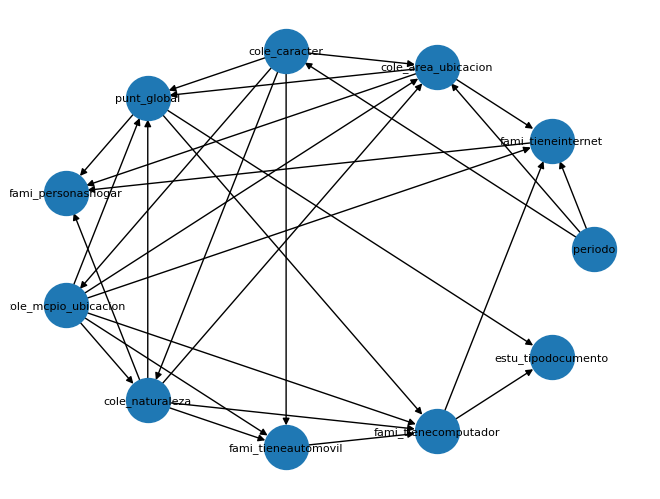

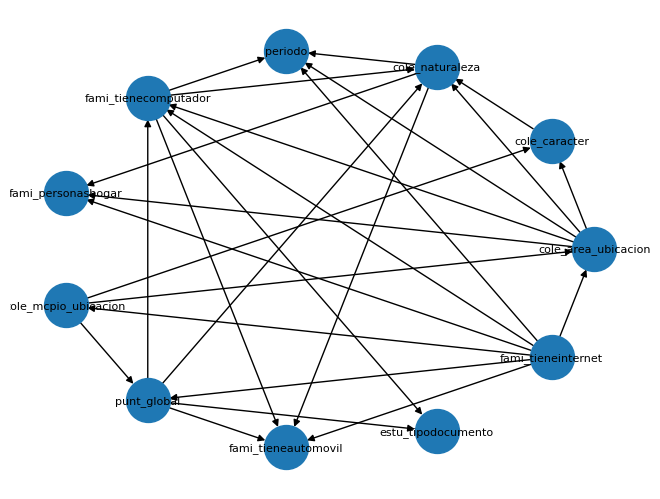

In [7]:
nx.draw_circular(modelo_k2,with_labels=True,arrowsize=10,font_size=8,node_size=1000)
plt.show()

nx.draw_circular(modelo_BS,with_labels=True,arrowsize=10,font_size=8,node_size=1000)
plt.show()

In [40]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from pgmpy.estimators import MaximumLikelihoodEstimator

# defina el servidor para llevar el registro de modelos y artefactos
mlflow.set_tracking_uri('http://localhost:5000')
# registre el experimento
experiment = mlflow.set_experiment("Proyecto3")


with mlflow.start_run(experiment_id=experiment.experiment_id):

    modelo_BS = BayesianNetwork(lista_k2)

    list_BS=list(estimated_modelh.nodes())

    data_k2 = df_global[list_BS]

    sample_train_BS, sample_test_BS = train_test_split(data_BS, test_size=0.2, random_state=77)
    emv = MaximumLikelihoodEstimator(model = modelo_BS, data = sample_train_BS)

    modelo_BS.fit(data=sample_train_BS, estimator=MaximumLikelihoodEstimator)

    y_real = sample_test_BS["punt_global"].values

    df2 = sample_test_BS.drop(columns=['punt_global'])
    y_p = modelo_BS.predict(df2)

    result = accuracy_score(y_real, y_p)

    print("Accuracy del mejor modelo:", result)
    # Cree y registre la métrica de interés
    mlflow.log_metric("accuracy", result)
    clases = ["1","2", "3", "4"]

    




100%|██████████| 2662/2662 [00:31<00:00, 84.22it/s] 


Accuracy del mejor modelo: 0.4123404255319149
